# Blind Quality Estimation by Disentangling Perceptual and Noisy Features in High Dynamic Range Images
Code for implemntation of the proposed percetual CNN. 

* Paper: [IEEE link](http://ieeexplore.ieee.org/document/8123879/).
* A simplified explanation of the proposed method is provided [here](\docs\HDR-PCNN.pdf). 


## Main Contents
* test.py : Usage example for evaluation of the quality of any provided HDR image.
* main.py : Example code to reproduce results in paper. Refer to read me in \data
* model.py: Model definitions and training script.
* data_utils.py : Helper functions required for training.
* \weights : Trained weights for dataset in paper.
* \tmp : Has visualization of the sub-networks. 

## Demo

Entire model and associated functions are in model.py. This file and weights would suffice for quality prediction on images.

In [20]:
from model import *
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time

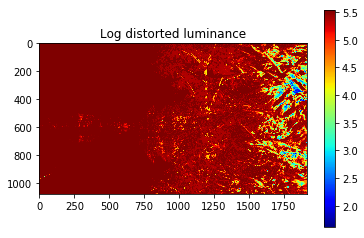

In [21]:
fname = "data\\test.exr"
plt.imshow( np.log(get_luminance(cv2.imread(fname))), cmap='jet' )
plt.title("Log distorted luminance")
plt.colorbar()
plt.show()

The model have to be initalied with this call. This loads the model and the weights required. 

In [22]:
qmodel  = model_IQA_HDR(load_weights=1)

Once initalized the quality prediction is performed by using this call.

In [26]:
start_time = time.time()
[perceptual_distortion,fmap] = qmodel.predict_quality(fname)
stop_time  = time.time()

*perceptual_distortion* has the overall score for the image. It signifies the amount of perceivable distortion in the image. The localizaion of these distortions are in *fmap*. 

Note that the results are shown with predictions on nonoverlapping blocks of size 32x32 on the image. Blocks can be made by sampling around every pixel for a more continous quality map. This is however computaionally expensive.

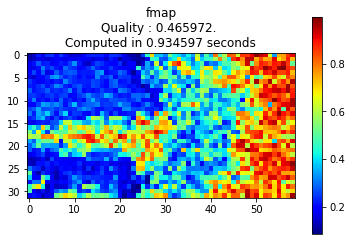

In [27]:
plt.imshow(fmap, cmap='jet')
plt.title("fmap\nQuality : "+ str(perceptual_distortion)+". \nComputed in %f seconds"%((stop_time-start_time)) )
plt.colorbar()
plt.show()

## Advanced
For prediction of the perceptual resistances, the subnetworks can be used directly. An example usage can be found in *predict_quality()*. 

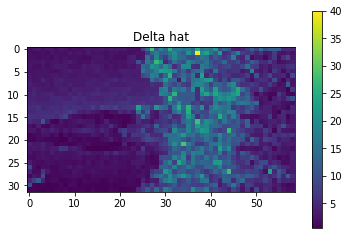

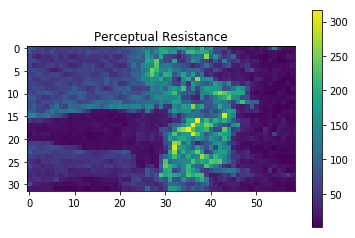

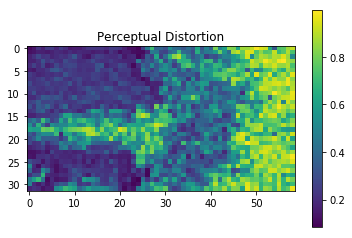

In [25]:
[perceptual_distortion,fmap] = qmodel.predict_quality(fname,draw=1)